### Task 1.1

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
import matplotlib.pyplot as plt
from tqdm import tqdm


resnet = models.resnet152(weights=models.ResNet152_Weights.IMAGENET1K_V1)

for param in resnet.parameters():
    param.requires_grad = False

resnet.fc = nn.Linear(resnet.fc.in_features, 10)

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

train_dataset = datasets.CIFAR10('./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10('./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet = resnet.to(device)

In [2]:
print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
optimiser = torch.optim.Adam(resnet.fc.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

train_losses = []
test_losses = []
train_accs = []
test_accs = []

for epoch in range(5):
    running_loss = 0.0
    for data, target in tqdm(train_loader, desc=f"Epoch {epoch+1} Training"):
        data, target = data.to(device), target.to(device)
        optimiser.zero_grad()
        output = resnet(data)
        loss = criterion(output, target)
        loss.backward()
        optimiser.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Train Loss: {running_loss/len(train_loader)}, Train Accuracy: {(output.argmax(dim=1) == target).float().mean().item()}")
    train_losses.append(running_loss/len(train_loader))
    train_accs.append((output.argmax(dim=1) == target).float().mean().item())

    with torch.no_grad():
        test_loss = 0.0
        for data, target in tqdm(test_loader, desc=f"Epoch {epoch+1} Testing"):
            data, target = data.to(device), target.to(device)
            output = resnet(data)
            loss = criterion(output, target)
            test_loss += loss.item()
        print(f"Epoch {epoch+1}, Test Loss: {test_loss/len(test_loader)}, Test Accuracy: {(output.argmax(dim=1) == target).float().mean().item()}")
        test_losses.append(test_loss/len(test_loader))
        test_accs.append((output.argmax(dim=1) == target).float().mean().item())


Epoch 1 Training: 100%|██████████| 391/391 [05:23<00:00,  1.21it/s]


Epoch 1, Train Loss: 0.4895280269939271, Train Accuracy: 0.8500000238418579


Epoch 1 Testing: 100%|██████████| 79/79 [01:09<00:00,  1.14it/s]


Epoch 1, Test Loss: 0.5446243248408353, Test Accuracy: 0.6875


Epoch 2 Training: 100%|██████████| 391/391 [05:31<00:00,  1.18it/s]


Epoch 2, Train Loss: 0.45883514318624724, Train Accuracy: 0.8375000357627869


Epoch 2 Testing: 100%|██████████| 79/79 [01:05<00:00,  1.21it/s]


Epoch 2, Test Loss: 0.5283049013041243, Test Accuracy: 0.75


Epoch 3 Training: 100%|██████████| 391/391 [05:27<00:00,  1.19it/s]


Epoch 3, Train Loss: 0.4431035614684415, Train Accuracy: 0.7750000357627869


Epoch 3 Testing: 100%|██████████| 79/79 [01:06<00:00,  1.19it/s]


Epoch 3, Test Loss: 0.5285282738601105, Test Accuracy: 0.75


Epoch 4 Training: 100%|██████████| 391/391 [05:31<00:00,  1.18it/s]


Epoch 4, Train Loss: 0.4415386467028762, Train Accuracy: 0.862500011920929


Epoch 4 Testing: 100%|██████████| 79/79 [01:04<00:00,  1.22it/s]


Epoch 4, Test Loss: 0.5404781559600106, Test Accuracy: 0.8125


Epoch 5 Training: 100%|██████████| 391/391 [05:26<00:00,  1.20it/s]


Epoch 5, Train Loss: 0.43645924337379766, Train Accuracy: 0.824999988079071


Epoch 5 Testing: 100%|██████████| 79/79 [01:04<00:00,  1.22it/s]

Epoch 5, Test Loss: 0.5284448997883857, Test Accuracy: 0.75


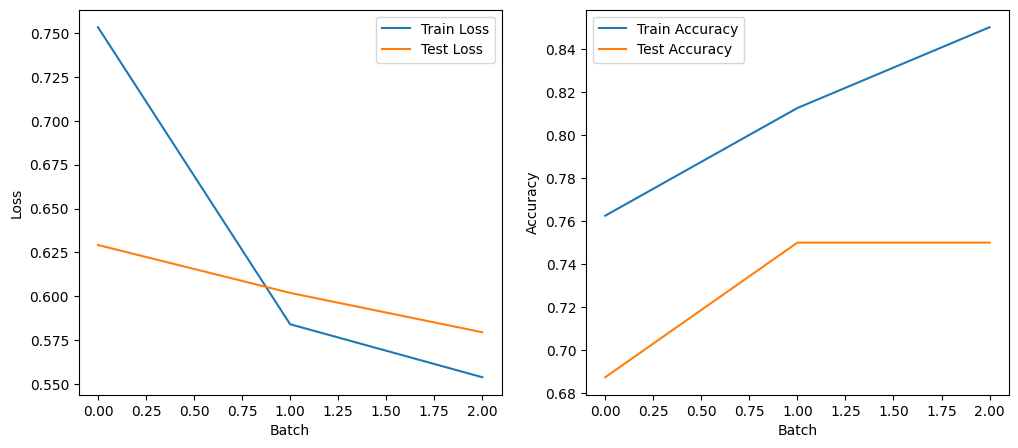

In [ ]:
#plot losses and accuracies for training and test
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Train Accuracy')
plt.plot(test_accs, label='Test Accuracy')
plt.xlabel('Batch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Task 1.2

In [ ]:
import inspect

resnet = models.resnet152(weights=models.ResNet152_Weights.IMAGENET1K_V1)


for target_block in [resnet.layer1[0], resnet.layer2[0], resnet.layer3[0], resnet.layer4[0]]:
    source_code = inspect.getsource(type(target_block))
    print(f"--- Source code for {type(target_block).__name__} ---")
    print(source_code)



--- Source code for Bottleneck ---
class Bottleneck(nn.Module):
    # Bottleneck in torchvision places the stride for downsampling at 3x3 convolution(self.conv2)
    # while original implementation places the stride at the first 1x1 convolution(self.conv1)
    # according to "Deep residual learning for image recognition" https://arxiv.org/abs/1512.03385.
    # This variant is also known as ResNet V1.5 and improves accuracy according to
    # https://ngc.nvidia.com/catalog/model-scripts/nvidia:resnet_50_v1_5_for_pytorch.

    expansion: int = 4

    def __init__(
        self,
        inplanes: int,
        planes: int,
        stride: int = 1,
        downsample: Optional[nn.Module] = None,
        groups: int = 1,
        base_width: int = 64,
        dilation: int = 1,
        norm_layer: Optional[Callable[..., nn.Module]] = None,
    ) -> None:
        super().__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        width = int(planes * (base_width /

In [15]:
import types

def skip_disabled_forward(self, x):
    # identity = x

    out = self.conv1(x)
    out = self.bn1(out)
    out = self.relu(out)

    out = self.conv2(out)
    out = self.bn2(out)
    out = self.relu(out)

    out = self.conv3(out)
    out = self.bn3(out)

    # if self.downsample is not None:
    #     identity = self.downsample(x)

    # out += identity
    out = self.relu(out)

    return out


resnet.layer3[0].forward = types.MethodType(skip_disabled_forward, resnet.layer3[0])
resnet.layer4[0].forward = types.MethodType(skip_disabled_forward, resnet.layer4[0])
resnet.layer3[35].forward = types.MethodType(skip_disabled_forward, resnet.layer3[35])
resnet.layer4[2].forward = types.MethodType(skip_disabled_forward, resnet.layer4[2])

for param in resnet.parameters():
    param.requires_grad = False

resnet.fc = nn.Linear(resnet.fc.in_features, 10)
resnet = resnet.to(device)

In [16]:
optimiser = torch.optim.Adam(resnet.fc.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

train_losses = []
test_losses = []
train_accs = []
test_accs = []

for epoch in range(5):
    running_loss = 0.0
    for data, target in tqdm(train_loader, desc=f"Epoch {epoch+1} Training"):
        data, target = data.to(device), target.to(device)
        optimiser.zero_grad()
        output = resnet(data)
        loss = criterion(output, target)
        loss.backward()
        optimiser.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Train Loss: {running_loss/len(train_loader)}, Train Accuracy: {(output.argmax(dim=1) == target).float().mean().item()}")
    train_losses.append(running_loss/len(train_loader))
    train_accs.append((output.argmax(dim=1) == target).float().mean().item())

    with torch.no_grad():
        test_loss = 0.0
        for data, target in tqdm(test_loader, desc=f"Epoch {epoch+1} Testing"):
            data, target = data.to(device), target.to(device)
            output = resnet(data)
            loss = criterion(output, target)
            test_loss += loss.item()
        print(f"Epoch {epoch+1}, Test Loss: {test_loss/len(test_loader)}, Test Accuracy: {(output.argmax(dim=1) == target).float().mean().item()}")
        test_losses.append(test_loss/len(test_loader))
        test_accs.append((output.argmax(dim=1) == target).float().mean().item())


Epoch 1 Training: 100%|██████████| 391/391 [04:55<00:00,  1.32it/s]


Epoch 1, Train Loss: 2.139353291152993, Train Accuracy: 0.17499999701976776


Epoch 1 Testing: 100%|██████████| 79/79 [01:13<00:00,  1.07it/s]


Epoch 1, Test Loss: 2.0886208935628963, Test Accuracy: 0.25


Epoch 2 Training: 100%|██████████| 391/391 [06:16<00:00,  1.04it/s]


Epoch 2, Train Loss: 2.0693016707744745, Train Accuracy: 0.23749999701976776


Epoch 2 Testing: 100%|██████████| 79/79 [01:06<00:00,  1.19it/s]


Epoch 2, Test Loss: 2.061825814126413, Test Accuracy: 0.25


Epoch 3 Training: 100%|██████████| 391/391 [04:39<00:00,  1.40it/s]


Epoch 3, Train Loss: 2.0457732860389575, Train Accuracy: 0.25


Epoch 3 Testing: 100%|██████████| 79/79 [00:55<00:00,  1.42it/s]


Epoch 3, Test Loss: 2.0622536804102642, Test Accuracy: 0.25


Epoch 4 Training: 100%|██████████| 391/391 [05:02<00:00,  1.29it/s]


Epoch 4, Train Loss: 2.0344541755783587, Train Accuracy: 0.20000000298023224


Epoch 4 Testing: 100%|██████████| 79/79 [01:02<00:00,  1.27it/s]


Epoch 4, Test Loss: 2.047809787943393, Test Accuracy: 0.1875


Epoch 5 Training: 100%|██████████| 391/391 [05:10<00:00,  1.26it/s]


Epoch 5, Train Loss: 2.0262507075239022, Train Accuracy: 0.26250001788139343


Epoch 5 Testing: 100%|██████████| 79/79 [01:02<00:00,  1.27it/s]

Epoch 5, Test Loss: 2.0539940957781635, Test Accuracy: 0.125


### Task 1.3 + 1.5

In [ ]:
resnet = models.resnet152(weights=models.ResNet152_Weights.IMAGENET1K_V1)

for param in resnet.parameters():    
    param.requires_grad = False
resnet.fc = nn.Linear(resnet.fc.in_features, 10)
resnet = resnet.to(device)

optimiser = torch.optim.Adam(resnet.fc.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

train_losses = []
test_losses = []
train_accs = []
test_accs = []

for epoch in range(4):
    running_loss = 0.0
    for data, target in tqdm(train_loader, desc=f"Epoch {epoch+1} Training"):
        data, target = data.to(device), target.to(device)
        optimiser.zero_grad()
        output = resnet(data)
        loss = criterion(output, target)
        loss.backward()
        optimiser.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Train Loss: {running_loss/len(train_loader)}, Train Accuracy: {(output.argmax(dim=1) == target).float().mean().item()}")
    train_losses.append(running_loss/len(train_loader))
    train_accs.append((output.argmax(dim=1) == target).float().mean().item())

Epoch 1 Training: 100%|██████████| 391/391 [05:01<00:00,  1.30it/s]


Epoch 1, Train Loss: 0.7989719415564671, Train Accuracy: 0.824999988079071


Epoch 2 Training: 100%|██████████| 391/391 [05:01<00:00,  1.30it/s]


Epoch 2, Train Loss: 0.5865097965120964, Train Accuracy: 0.8125


Epoch 3 Training: 100%|██████████| 391/391 [04:47<00:00,  1.36it/s]


Epoch 3, Train Loss: 0.5538421019416331, Train Accuracy: 0.8375000357627869


Epoch 4 Training: 100%|██████████| 391/391 [04:43<00:00,  1.38it/s]

Epoch 4, Train Loss: 0.5385458672900334, Train Accuracy: 0.7750000357627869


In [ ]:
# torch.save(resnet.state_dict(), 'resnet152_cifar10.pth')

In [2]:
resnet = models.resnet152(weights=None)
resnet.fc = nn.Linear(resnet.fc.in_features, 10)
resnet.load_state_dict(torch.load('resnet152_cifar10.pth'))
resnet = resnet.to(device)

Hook registered for layer: layer1
Hook registered for layer: layer3
Hook registered for layer: avgpool
Hook registered for layer: fc

Processing t-SNE for layer: layer1
Shape for t-SNE input (layer1): (128, 256)


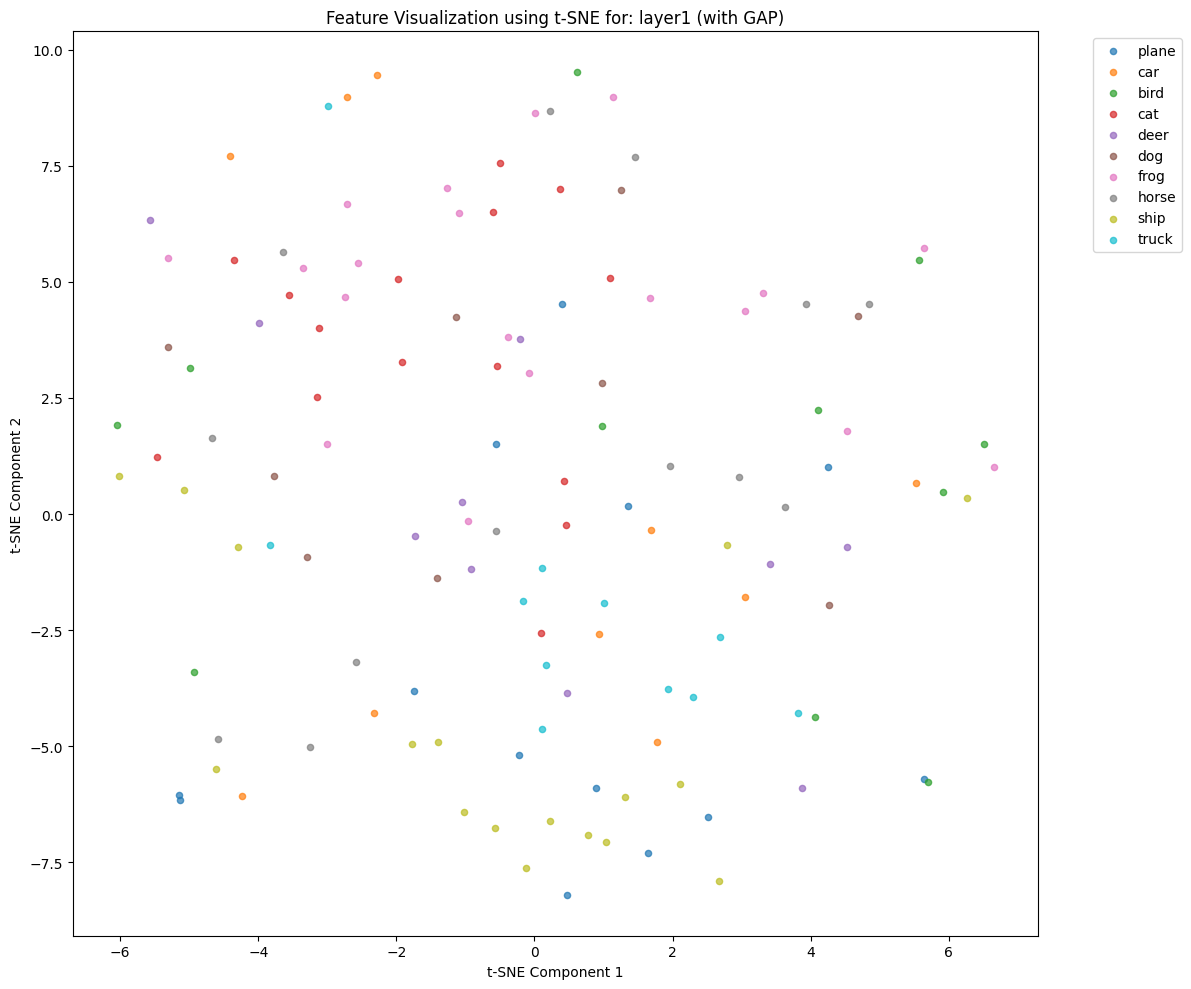


Processing t-SNE for layer: layer3
Shape for t-SNE input (layer3): (128, 1024)


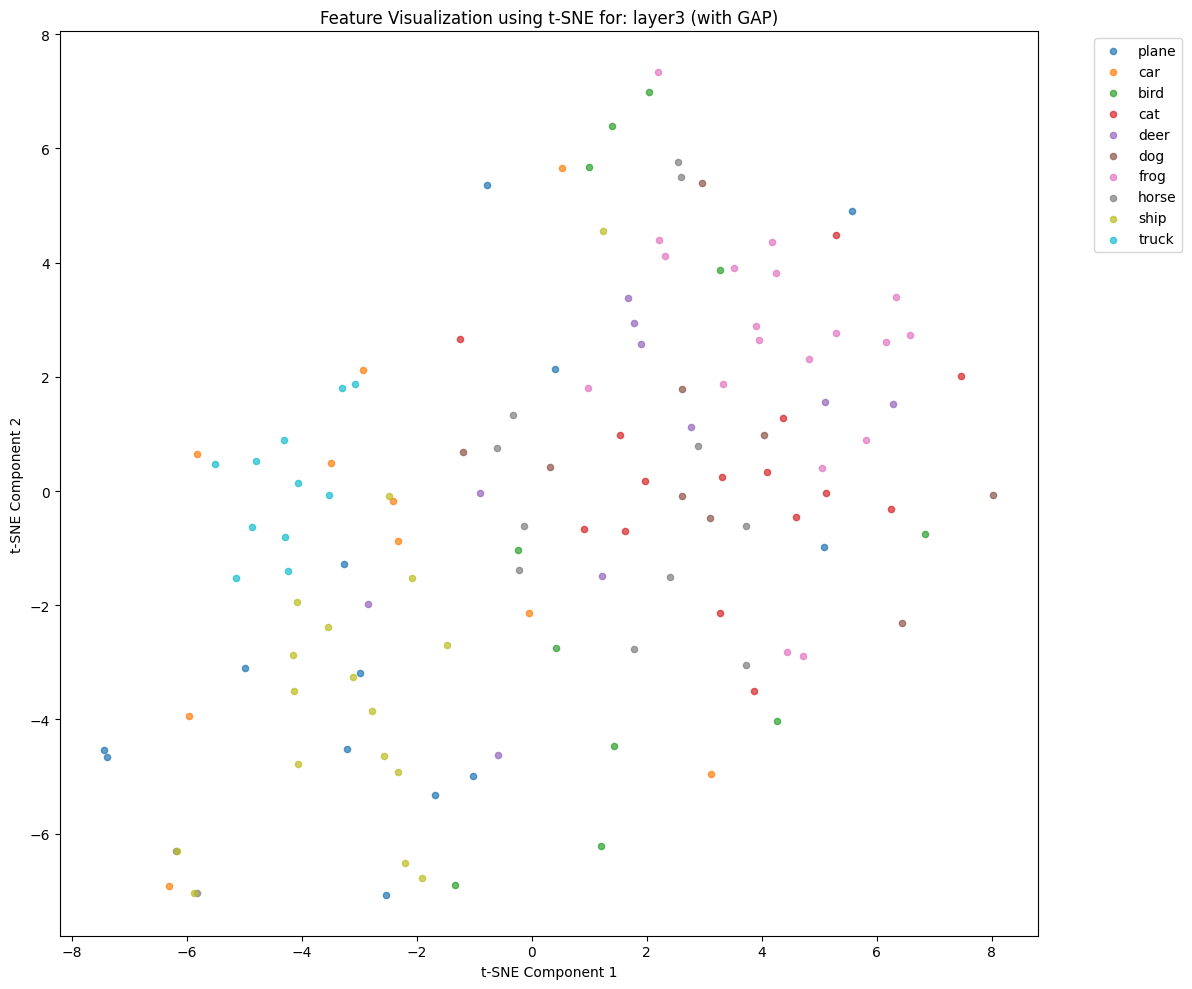


Processing t-SNE for layer: avgpool
Shape for t-SNE input (avgpool): (128, 2048)


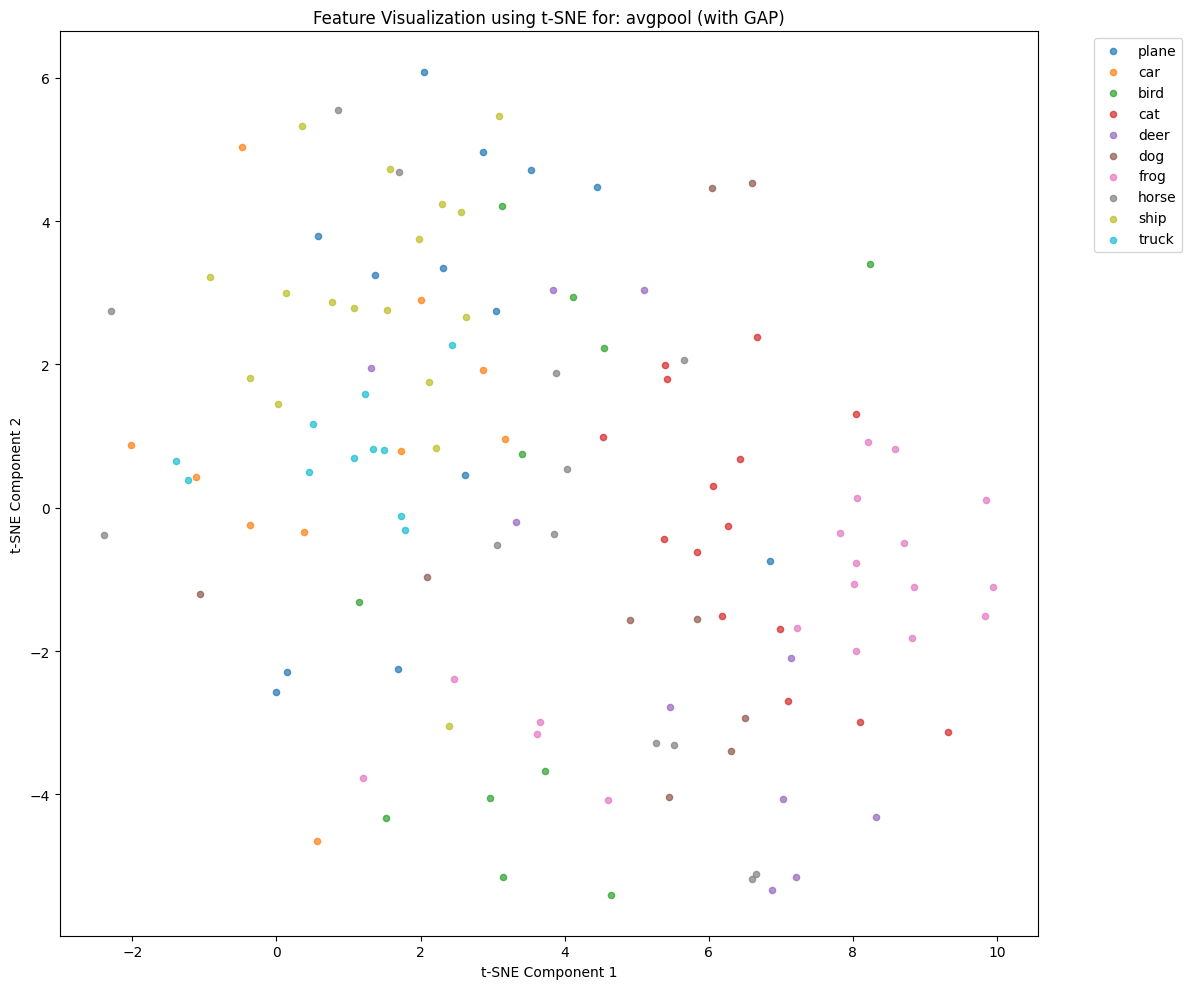


Processing t-SNE for layer: fc
Shape for t-SNE input (fc): (128, 10)


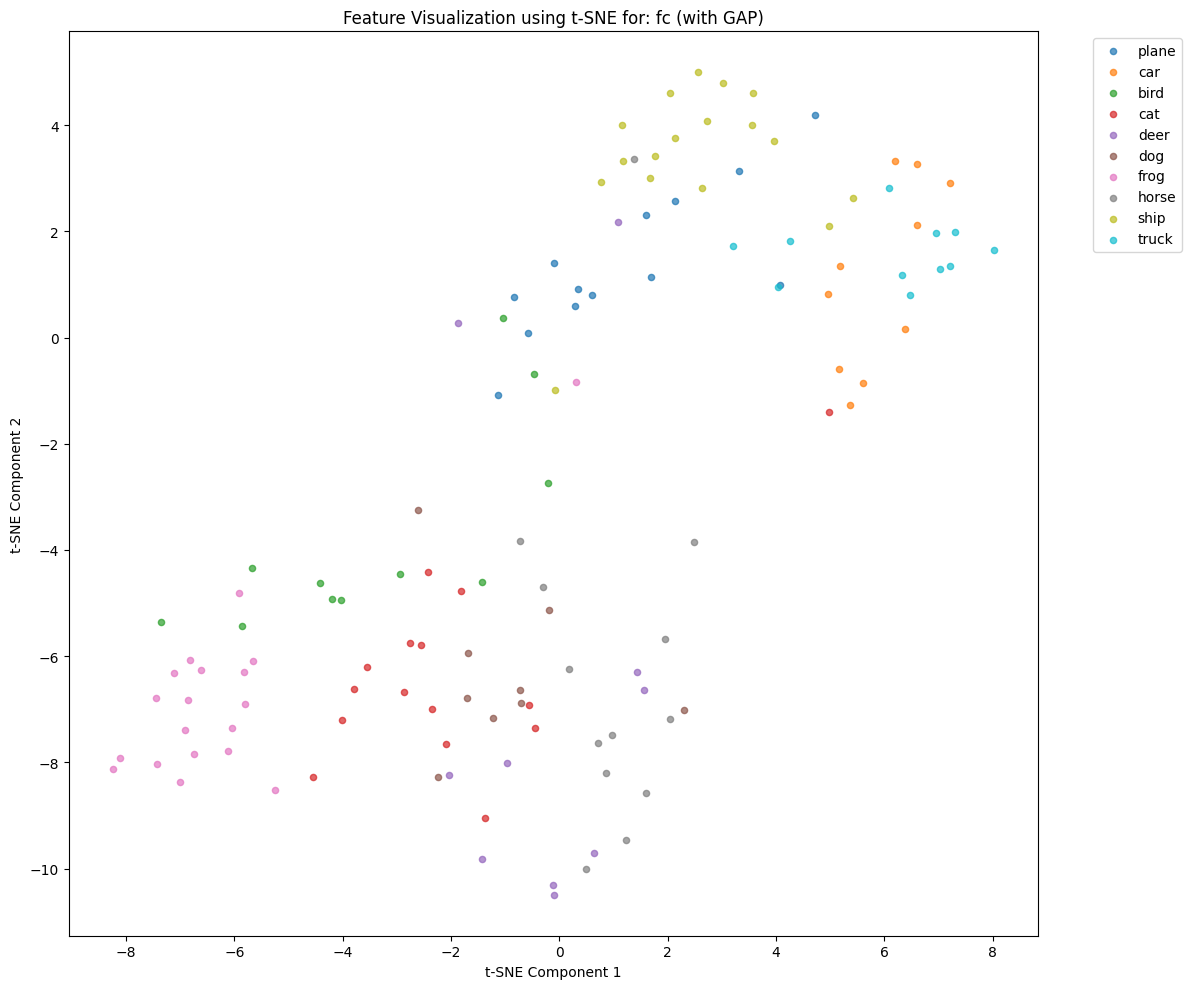

In [4]:
from sklearn.manifold import TSNE

features = {}
resnet.eval()

def get_features_hook(name):
    def hook(model, input, output):
        features[name] = output.detach()
    return hook

for name, module in resnet.named_modules():
    if name in ['layer1', 'layer3', 'avgpool', 'fc']:
        module.register_forward_hook(get_features_hook(name))
        print(f"Hook registered for layer: {name}")

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = resnet(data)
        break
    

labels_np = target.cpu().numpy()
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

for layer_name, layer_features in features.items():
    print(f"\nProcessing t-SNE for layer: {layer_name}")

    if len(layer_features.shape) == 4:
        features_processed = torch.mean(layer_features, dim=[2, 3])
    else:
        features_processed = layer_features

    features_flat = features_processed.view(features_processed.shape[0], -1).cpu().numpy()
    print(f"Shape for t-SNE input ({layer_name}): {features_flat.shape}")

    perplexity_value = min(30.0, features_flat.shape[0] - 1)
    tsne = TSNE(n_components=2, perplexity=perplexity_value, learning_rate='auto', init='pca', random_state=42)
    features_2d = tsne.fit_transform(features_flat)

    # 3. Plot the results
    plt.figure(figsize=(12, 10))
    for i in range(len(classes)):
        indices = (labels_np == i)
        plt.scatter(features_2d[indices, 0], features_2d[indices, 1], label=classes[i], alpha=0.7, s=20)
    plt.title(f"Feature Visualization using t-SNE for: {layer_name} (with GAP)")
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

Running UMAP...


c:\Users\jibra\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


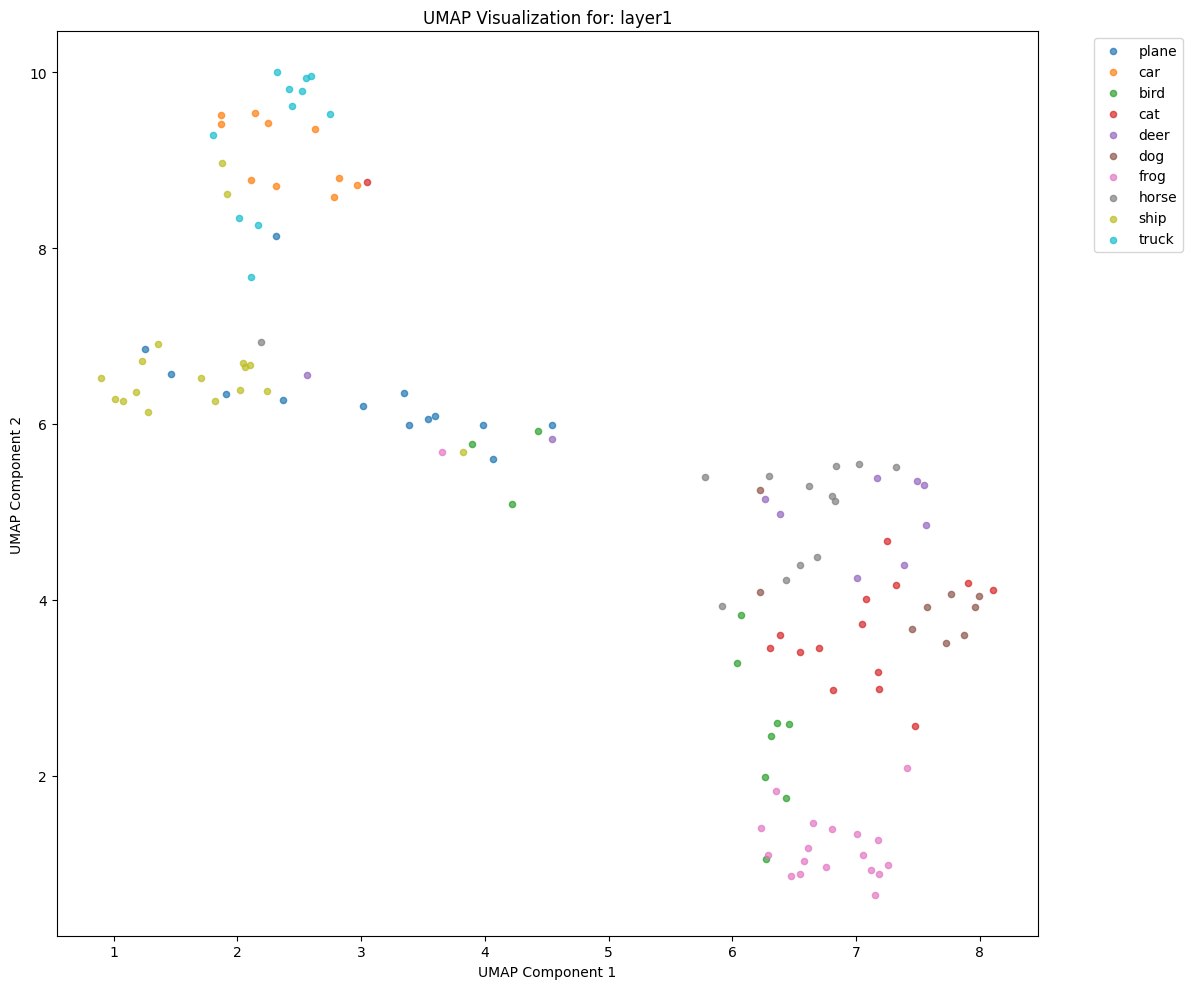

Running UMAP...


c:\Users\jibra\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


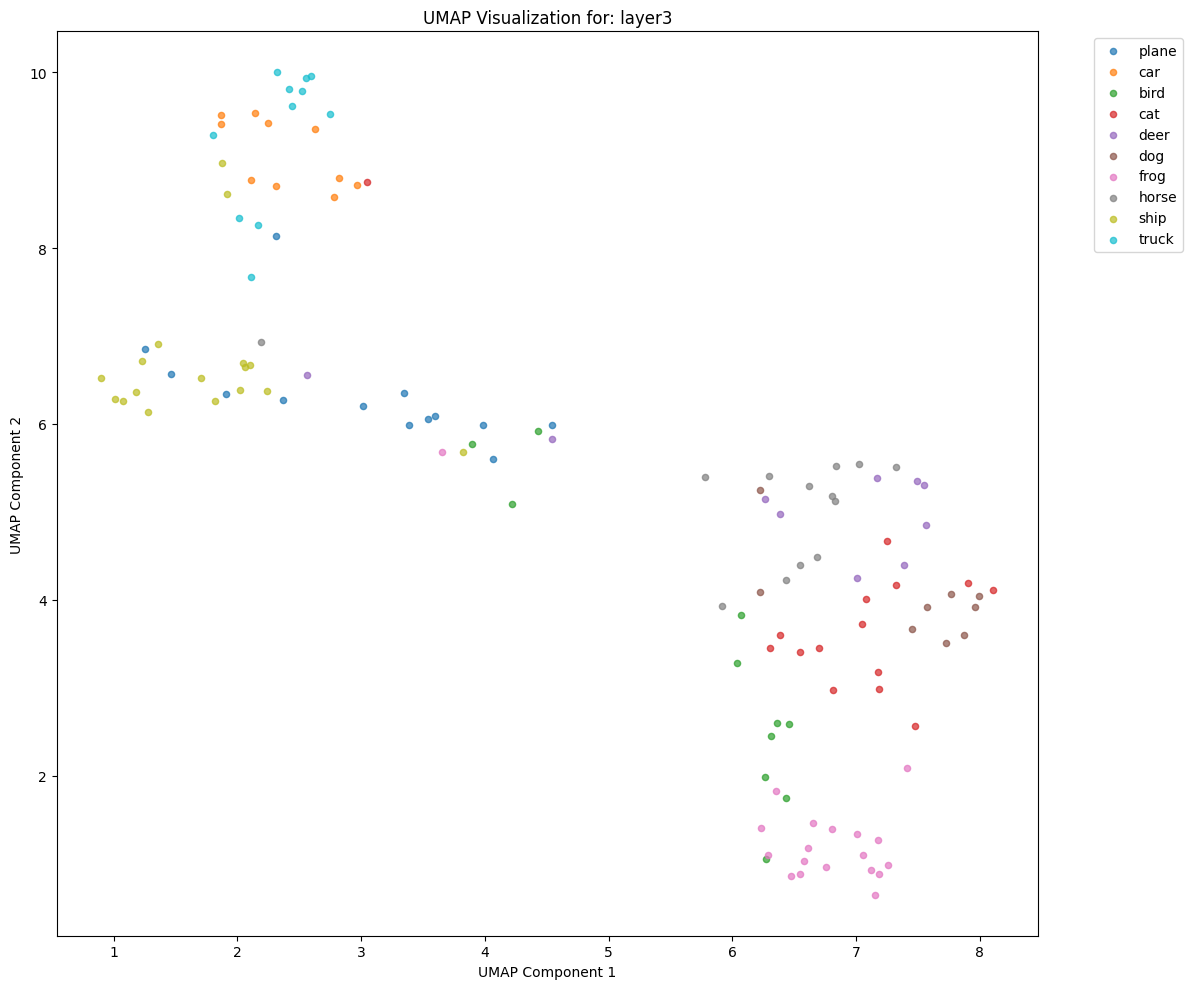

Running UMAP...


c:\Users\jibra\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


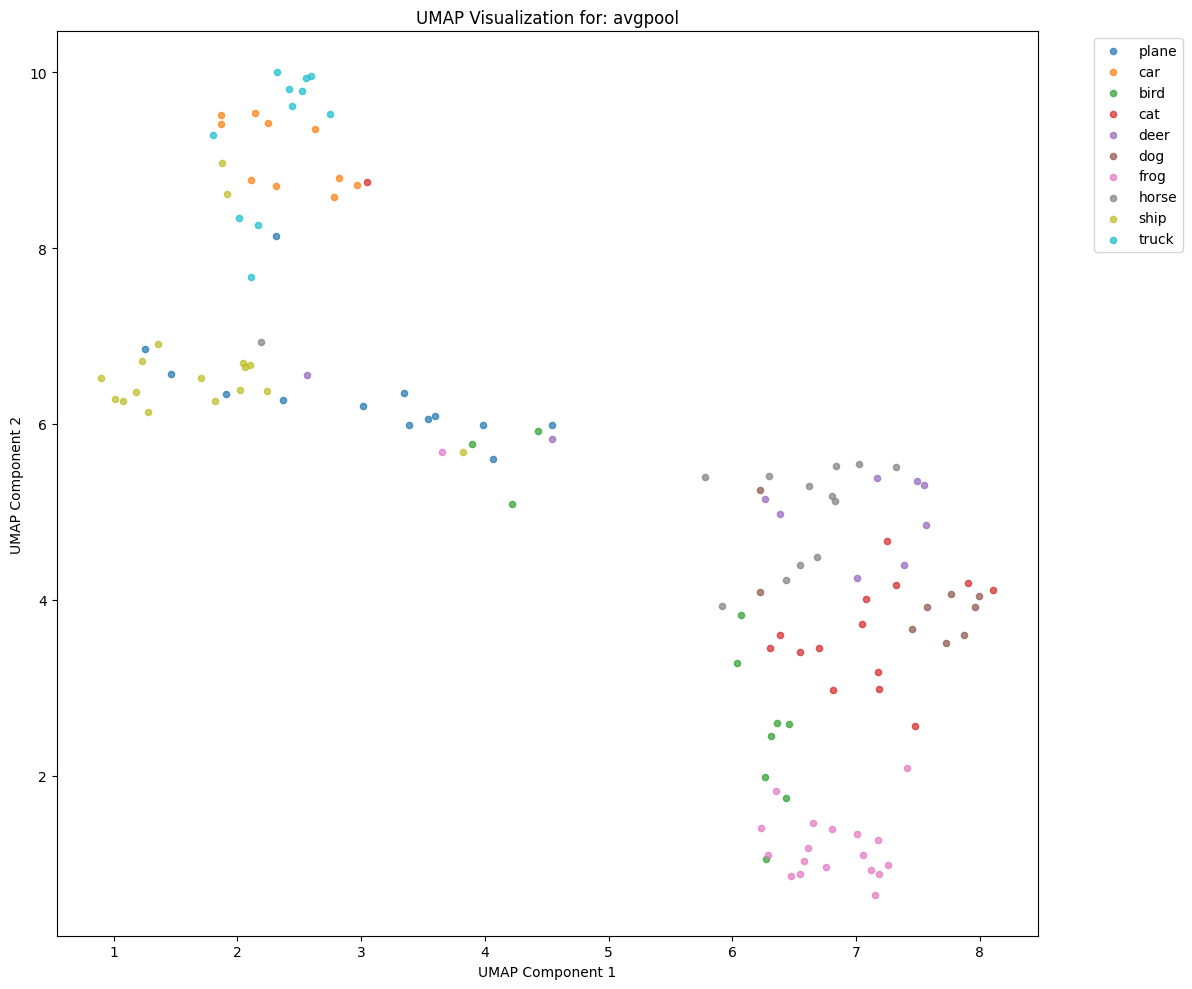

Running UMAP...


c:\Users\jibra\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


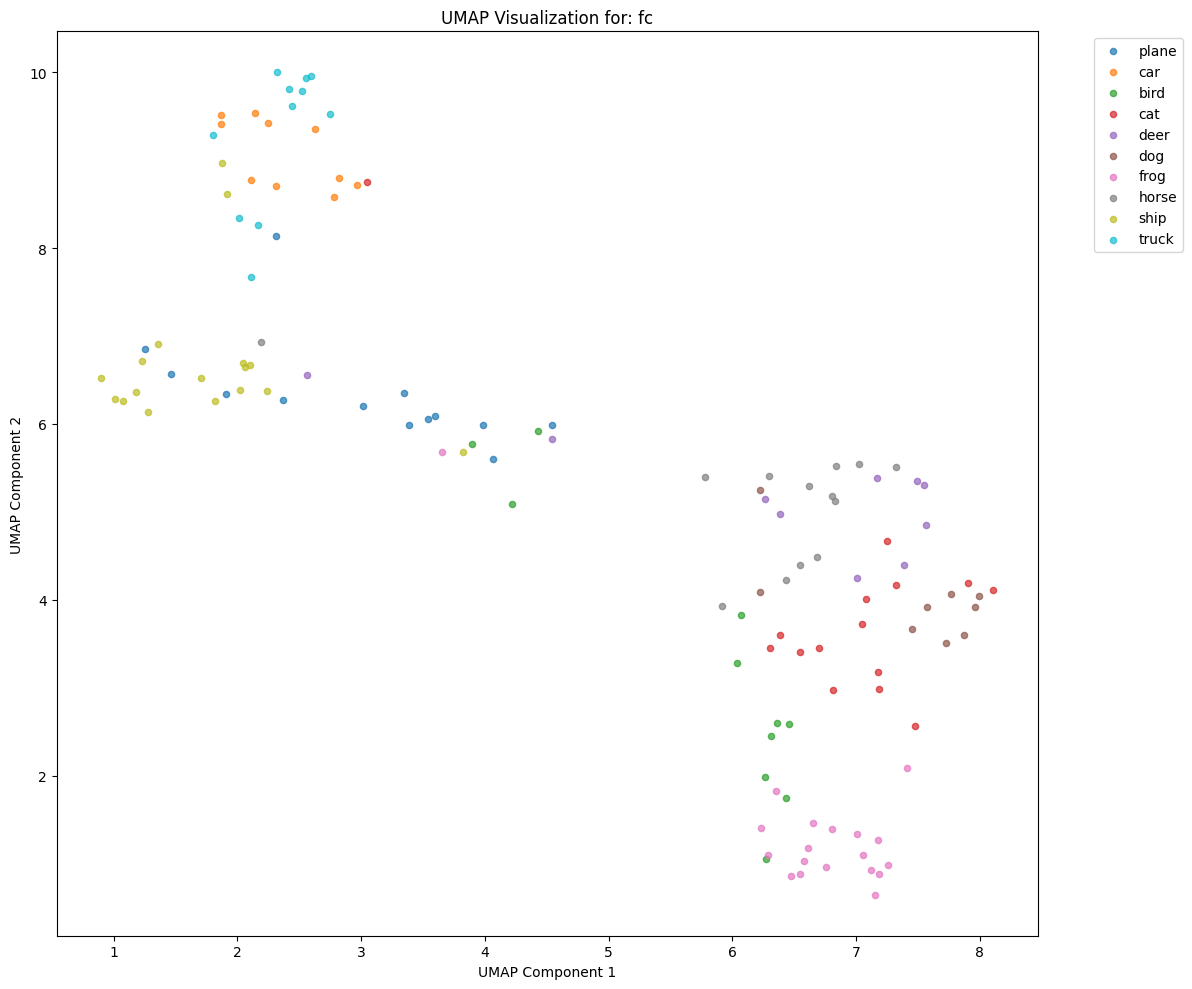

In [5]:
import umap

for layer_name, layer_features in features.items():
        print("Running UMAP...")
        n_neighbors_value = min(15, features_flat.shape[0] - 1) # UMAP requires n_neighbors < n_samples
        if n_neighbors_value > 1:
            reducer = umap.UMAP(n_neighbors=n_neighbors_value, min_dist=0.1, n_components=2, random_state=42)
            features_2d_umap = reducer.fit_transform(features_flat)

            # Plot UMAP results
            plt.figure(figsize=(12, 10))
            for i in range(len(classes)):
                indices = (labels_np == i)
                plt.scatter(features_2d_umap[indices, 0], features_2d_umap[indices, 1], label=classes[i], alpha=0.7, s=20)
            plt.title(f"UMAP Visualization for: {layer_name}")
            plt.xlabel("UMAP Component 1")
            plt.ylabel("UMAP Component 2")
            plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.tight_layout()
            plt.show()
        else:
            print(f"Skipping UMAP for {layer_name}: not enough samples for n_neighbors calculation.")